In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Car%20Price.csv')
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [67]:
df.describe()

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [68]:
df.isnull().sum()

Brand            0
Model            0
Year             0
Selling_Price    0
KM_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [102]:
df.corr()

,Year,Selling_Price,KM_Driven
Year,1.000000,0.413922,-0.419688
Selling_Price,0.413922,1.000000,-0.192289
KM_Driven,-0.419688,-0.192289,1.000000


In [73]:
df['Brand'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: Brand, dtype: int64

In [74]:
df['Model'].value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: Model, Length: 1491, dtype: int64

In [75]:
df['Seller_Type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: Seller_Type, dtype: int64

In [76]:
df['Owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: Owner, dtype: int64

In [77]:
df['Fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: Fuel, dtype: int64

In [78]:
df['Transmission'].value_counts()

Manual       3892
Automatic     448
Name: Transmission, dtype: int64

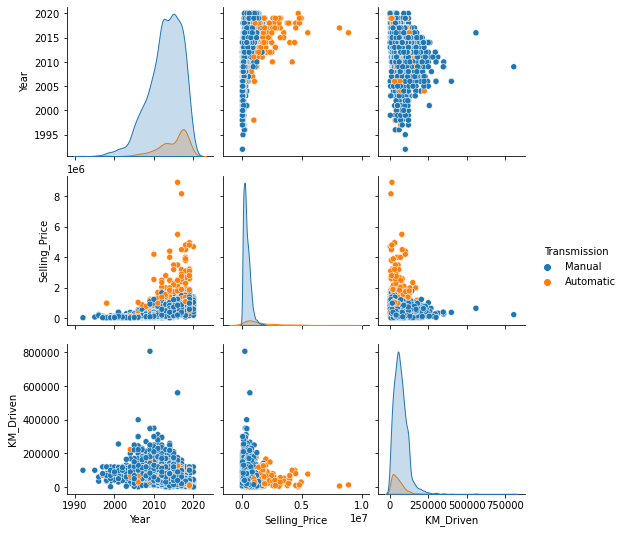

In [85]:
sns.pairplot(df,hue = 'Transmission')

In [87]:
dummies = pd.get_dummies(df,columns = ['Seller_Type','Owner','Fuel','Transmission'],drop_first=True)
dummies.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Transmission_Manual
0,Maruti,Maruti 800 AC,2007,60000,70000,1,0,0,0,0,0,0,0,0,1,1
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0,0,0,0,0,0,1,1
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0,0,0,1,0,0,0,1
3,Datsun,Datsun RediGO T Option,2017,250000,46000,1,0,0,0,0,0,0,0,0,1,1
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1,0,0,1,0,0,0,1


In [88]:
y =dummies['Selling_Price']

In [107]:
x = dummies.drop(['Brand','Model','Selling_Price'],axis =1)

In [122]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state =2429)

In [123]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [124]:
lr.score(xtrain,ytrain)

0.45187570990109593

In [125]:
lr.score(xtest,ytest)

0.49316805436428324

Text(0, 0.5, 'predicted values')

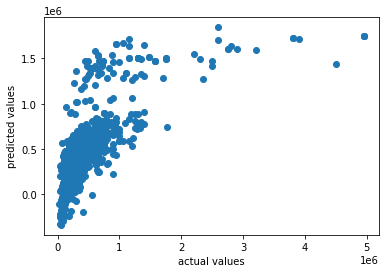

In [111]:
y_pred = lr.predict(xtest)

plt.scatter(ytest,y_pred)
plt.xlabel('actual values')
plt.ylabel('predicted values')

In [143]:
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor(n_estimators=800,max_depth = 16)
dt.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=16, n_estimators=800)

In [144]:
dt.score(xtest,ytest)

0.7566274394847075